#Etape 1 - Chargement des données

In [4]:
#Importation des librairies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
print (os.getcwd())

os.chdir(r"/content/gdrive/My Drive/Colab Notebooks/Formation/P12")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/Formation/P12


In [7]:
#Importation du fichier billets.csv
df_billets = pd.read_csv("billets.csv", sep=';', decimal='.')

#Etape 2 - Analyse exploratoire (EDA)


Là, c'est vous les pro 💪, je vous fais entièrement confiance 😉 !

Pssst (indice) : trouvez des variables corrélées à votre objectif, ça marche mieux 😉.

In [8]:
#Vérification des types de données
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Les colonnes de type "float64" seront transformées en "float32" afin de réduire le volume de la table et augmenter la vitesse de calculs des algorithmes.

In [9]:
#Transformation des colonnes de types float64 en float32
df_billets = df_billets.astype({col: np.float32 for col in df_billets.select_dtypes(include="float64").columns})
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float32
 2   height_left   1500 non-null   float32
 3   height_right  1500 non-null   float32
 4   margin_low    1463 non-null   float32
 5   margin_up     1500 non-null   float32
 6   length        1500 non-null   float32
dtypes: bool(1), float32(6)
memory usage: 36.8 KB


In [10]:
#Vérification de la présence de doublons
df_billets[df_billets.duplicated()]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


In [11]:
#Vérification du nombre de doublons
df_billets.duplicated().sum()

np.int64(0)

Il n'existe aucun doublon dans cette table.

In [12]:
#Vérification du nombre de valeurs manquantes
df_billets.isna().sum()

,0
is_genuine,0
diagonal,0
height_left,0
height_right,0
margin_low,37
margin_up,0
length,0


In [13]:
#Vérification des lignes ayant au moins une valeur manquante
df_manquants = df_billets[df_billets.isna().any(axis=1)]
df_manquants

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.940002,103.889999,103.449997,NaN,3.25,112.790001
99,True,171.929993,104.070000,104.180000,NaN,3.14,113.080002
151,True,172.070007,103.800003,104.379997,NaN,3.02,112.930000
197,True,171.449997,103.660004,103.800003,NaN,3.62,113.269997
241,True,171.830002,104.139999,104.059998,NaN,3.02,112.360001
251,True,171.800003,103.260002,102.820000,NaN,2.95,113.220001
284,True,171.919998,103.830002,103.760002,NaN,3.23,113.290001
334,True,171.850006,103.699997,103.959999,NaN,3.00,113.360001
410,True,172.559998,103.720001,103.510002,NaN,3.12,112.949997
413,True,172.300003,103.660004,103.500000,NaN,3.16,112.949997


Il existe 37 lignes avec des valeurs manquantes "NaN".

Elles sont uniquement présentes dans la colonne "margin_low"

Que faire ?

Il faut les garder de côté dans un premier temps.

Il faut d'abord déterminer la régression linéaire et entraîner avant de pouvoir revenir sur les valeurs manquantes et déterminer leurs valeurs probables.

In [14]:
#Supprimer les valeurs manquantes de df_billets
df_billets_filtre = df_billets.dropna()
df_billets_filtre

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.809998,104.860001,104.949997,4.52,2.89,112.830002
1,True,171.460007,103.360001,103.660004,3.77,2.99,113.089996
2,True,172.690002,104.480003,103.500000,4.40,2.94,113.160004
3,True,171.360001,103.910004,103.940002,3.62,3.01,113.510002
4,True,171.729996,104.279999,103.459999,4.04,3.48,112.540001
...,...,...,...,...,...,...,...
1495,False,171.750000,104.379997,104.169998,4.42,3.09,111.279999
1496,False,172.190002,104.629997,104.440002,5.27,3.37,110.970001
1497,False,171.800003,104.010002,104.120003,5.51,3.36,111.949997
1498,False,172.059998,104.279999,104.059998,5.17,3.46,112.250000


In [15]:
#Vérification du nombre de valeurs manquantes
df_billets_filtre.isna().sum()

,0
is_genuine,0
diagonal,0
height_left,0
height_right,0
margin_low,0
margin_up,0
length,0


In [16]:
#Calcul du nombre distinct de billets True et False
df_billets_filtre['is_genuine'].value_counts()

,count
is_genuine,
True,971
False,492


In [17]:
#Calcul de la proportion de billets True
df_billets_filtre['is_genuine'].value_counts(normalize=True)

,proportion
is_genuine,
True,0.663705
False,0.336295


In [18]:
#Calcul de la propotion de billets False
1 - df_billets_filtre['is_genuine'].value_counts(normalize=True)

,proportion
is_genuine,
True,0.336295
False,0.663705


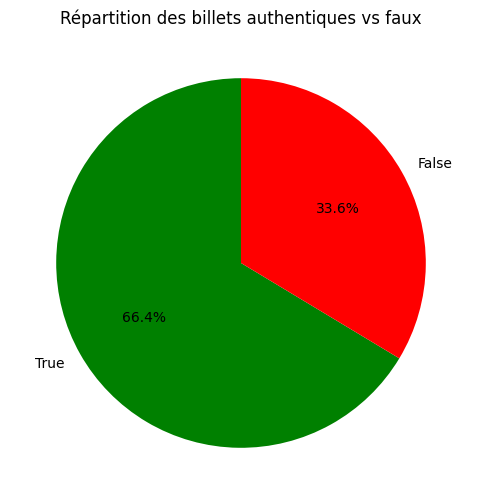

In [19]:
#Comptage des valeurs normalisées
counts = df_billets_filtre['is_genuine'].value_counts(normalize=True)

#Transformation en pourcentages
counts_percent = counts * 100

#Création du graphique à secteurs
plt.figure(figsize=(6,6))
plt.pie(
    counts_percent,
    labels=counts_percent.index,
    autopct='%1.1f%%',
    colors=['green','red'],
    startangle=90
)
plt.title("Répartition des billets authentiques vs faux")
plt.show()


#Etape 3 - Régression linéraire

##3.1 - Calcul de la régression linéaire

In [20]:
#Vérification de la multicolinéarité

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Variables explicatives (sans margin_low car c'est la cible)
X = df_billets_filtre[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]

#Ajout de la constante (intercept)
X_const = sm.add_constant(X)

#Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


       Variable            VIF
0         const  590197.976488
1      diagonal       1.013613
2   height_left       1.138261
3  height_right       1.230115
4     margin_up       1.404404
5        length       1.576950


Les VIF sont proches de 1 donc il n'y a aucune multicolinéarité problématique.
Toutes les variables peuvent être conservées pour la régression linéaire.

A l'exception de la constance, toutes les variables ont un VIF inférieurs à 2, ce qui est excellent et signifie que toues les variables sont indépendantes les unes des autres.

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     180.8
Date:                Fri, 12 Dec 2025   Prob (F-statistic):          8.90e-138
Time:                        23:19:53   Log-Likelihood:                -714.26
No. Observations:                1024   AIC:                             1441.
Df Residuals:                    1018   BIC:                             1470.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4848      0.015    294.392   

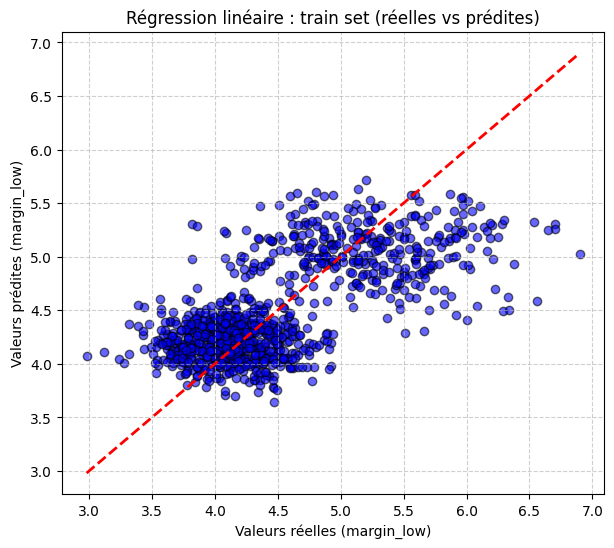

In [21]:
#Regression linéaire sur le train set

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Variables explicatives et cible
X = df_billets_filtre[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y = df_billets_filtre['margin_low']

#Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#Standardisation (centrer-réduire)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Reconversion en DataFrame pour garder les noms de colonnes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

#Ajout de la constante (intercept)
X_train_const = sm.add_constant(X_train_scaled)

#Régression linéaire sur le train
model = sm.OLS(y_train, X_train_const).fit()

#Résumé du modèle (train set)
print(model.summary())

#Équation de la régression
coeffs = model.params
equation = "margin_low = "
equation += f"{coeffs['const']:.3f} "
for var in X.columns:
    equation += f"+ ({coeffs[var]:.3f} * {var}) "
print("\nÉquation de la régression (train) :\n", equation)

#Prédictions sur le train
y_pred_train = model.predict(X_train_const)

#Évaluation du modèle sur le train
print("MSE (train) :", mean_squared_error(y_train, y_pred_train))
print("R² (train) :", r2_score(y_train, y_pred_train))

#Visualisation : valeurs réelles vs valeurs prédites (train set)
plt.figure(figsize=(7,6))
plt.scatter(y_train, y_pred_train, color="blue", alpha=0.6, edgecolors="k")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
         color="red", linestyle="--", linewidth=2)
plt.xlabel("Valeurs réelles (margin_low)")
plt.ylabel("Valeurs prédites (margin_low)")
plt.title("Régression linéaire : train set (réelles vs prédites)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Adjusted R-squared est à 0.46, ce qui signifie que les variables sont pertinentes.
p-value est inférieure à 0.05 donc les variables sont statistiquement significatives.
"length" a un fort impact négatif (coef. -0.3533 et p < 0.01), plus la longueur augmente plus "margin_low" diminue.
"diagonal" n'est pas significative (coef. -0.0265 et p > 0.05) donc n'a pas d'effet sur "margin_low".

In [22]:
from sklearn.linear_model import LinearRegression

# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients et intercept
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)

# Fonction de la régression linéaire
# y = intercept + coef1*x1 + coef2*x2 + ... + coefN*xN


Coefficients : [-0.08786777  0.17668262  0.2603643   0.28827065 -0.40492487]
Intercept : 18.871065


In [23]:
equation = "y = {:.3f}".format(model.intercept_)
for i, coef in enumerate(model.coef_):
    equation += " + {:.3f}*x{}".format(coef, i+1)
print("Équation de la régression :", equation)


Équation de la régression : y = 18.871 + -0.088*x1 + 0.177*x2 + 0.260*x3 + 0.288*x4 + -0.405*x5


##3.2 - Estimation des valeurs manquantes sur "margin_low"

In [24]:
mask = df_manquants['margin_low'].isna()


In [25]:
X_missing = df_manquants.loc[mask, ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
X_missing_const = sm.add_constant(X_missing, prepend=True)


In [26]:
y_pred_missing = model.predict(X_missing)


In [27]:
df_manquants.loc[mask, 'margin_low'] = y_pred_missing.astype('float32')
df_manquants.loc[mask, 'margin_low'] = y_pred_missing

In [28]:
#Fusion des tables df_billets_filtre et df_manquants

df_complet = pd.concat([df_billets_filtre, df_manquants], axis=0).reset_index(drop=True)


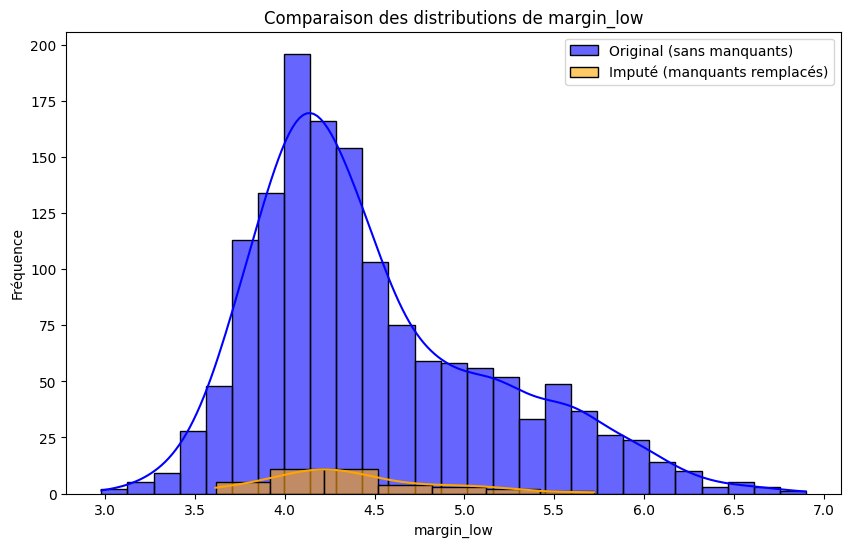

In [29]:
#Histogramme comparatif avant/après imputation pour margin_low

plt.figure(figsize=(10,6))

#Distribution originale (table sans valeurs manquantes)
sns.histplot(df_billets_filtre['margin_low'], color="blue", label="Original (sans manquants)", kde=True, alpha=0.6)

#Distribution après imputation (table avec valeurs remplacées)
sns.histplot(df_manquants['margin_low'], color="orange", label="Imputé (manquants remplacés)", kde=True, alpha=0.6)

plt.title("Comparaison des distributions de margin_low")
plt.xlabel("margin_low")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


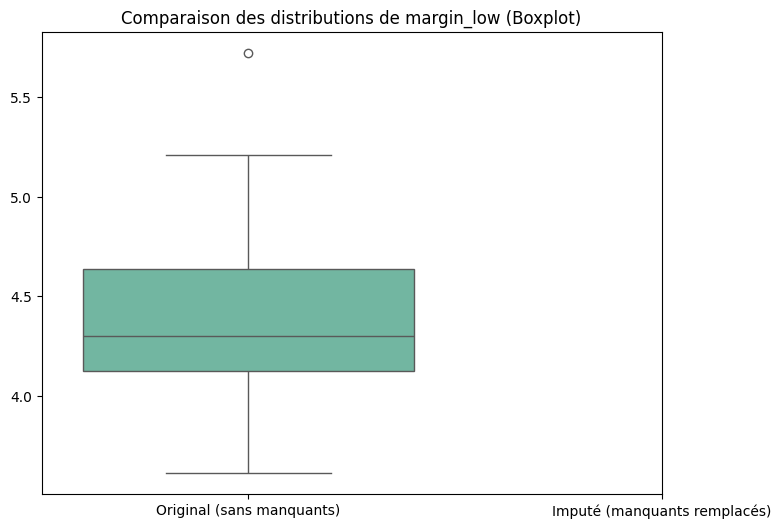

In [30]:
#Boîte à moustache comparative avant/après imputation pour margin_low
plt.figure(figsize=(8,6))
sns.boxplot(data=[df_billets_filtre['margin_low'], df_manquants['margin_low']], palette="Set2")
plt.xticks([0,1], ["Original (sans manquants)", "Imputé (manquants remplacés)"])
plt.title("Comparaison des distributions de margin_low (Boxplot)")
plt.show()


Un seul boxplot est représenté car les valeurs manquantes remplacées s'intègrent parfaitement dans la continuité des données.
Le modèle d'imputation a réintégré des valeurs cohérentes.

##3.3 - Visualisation du pair plot

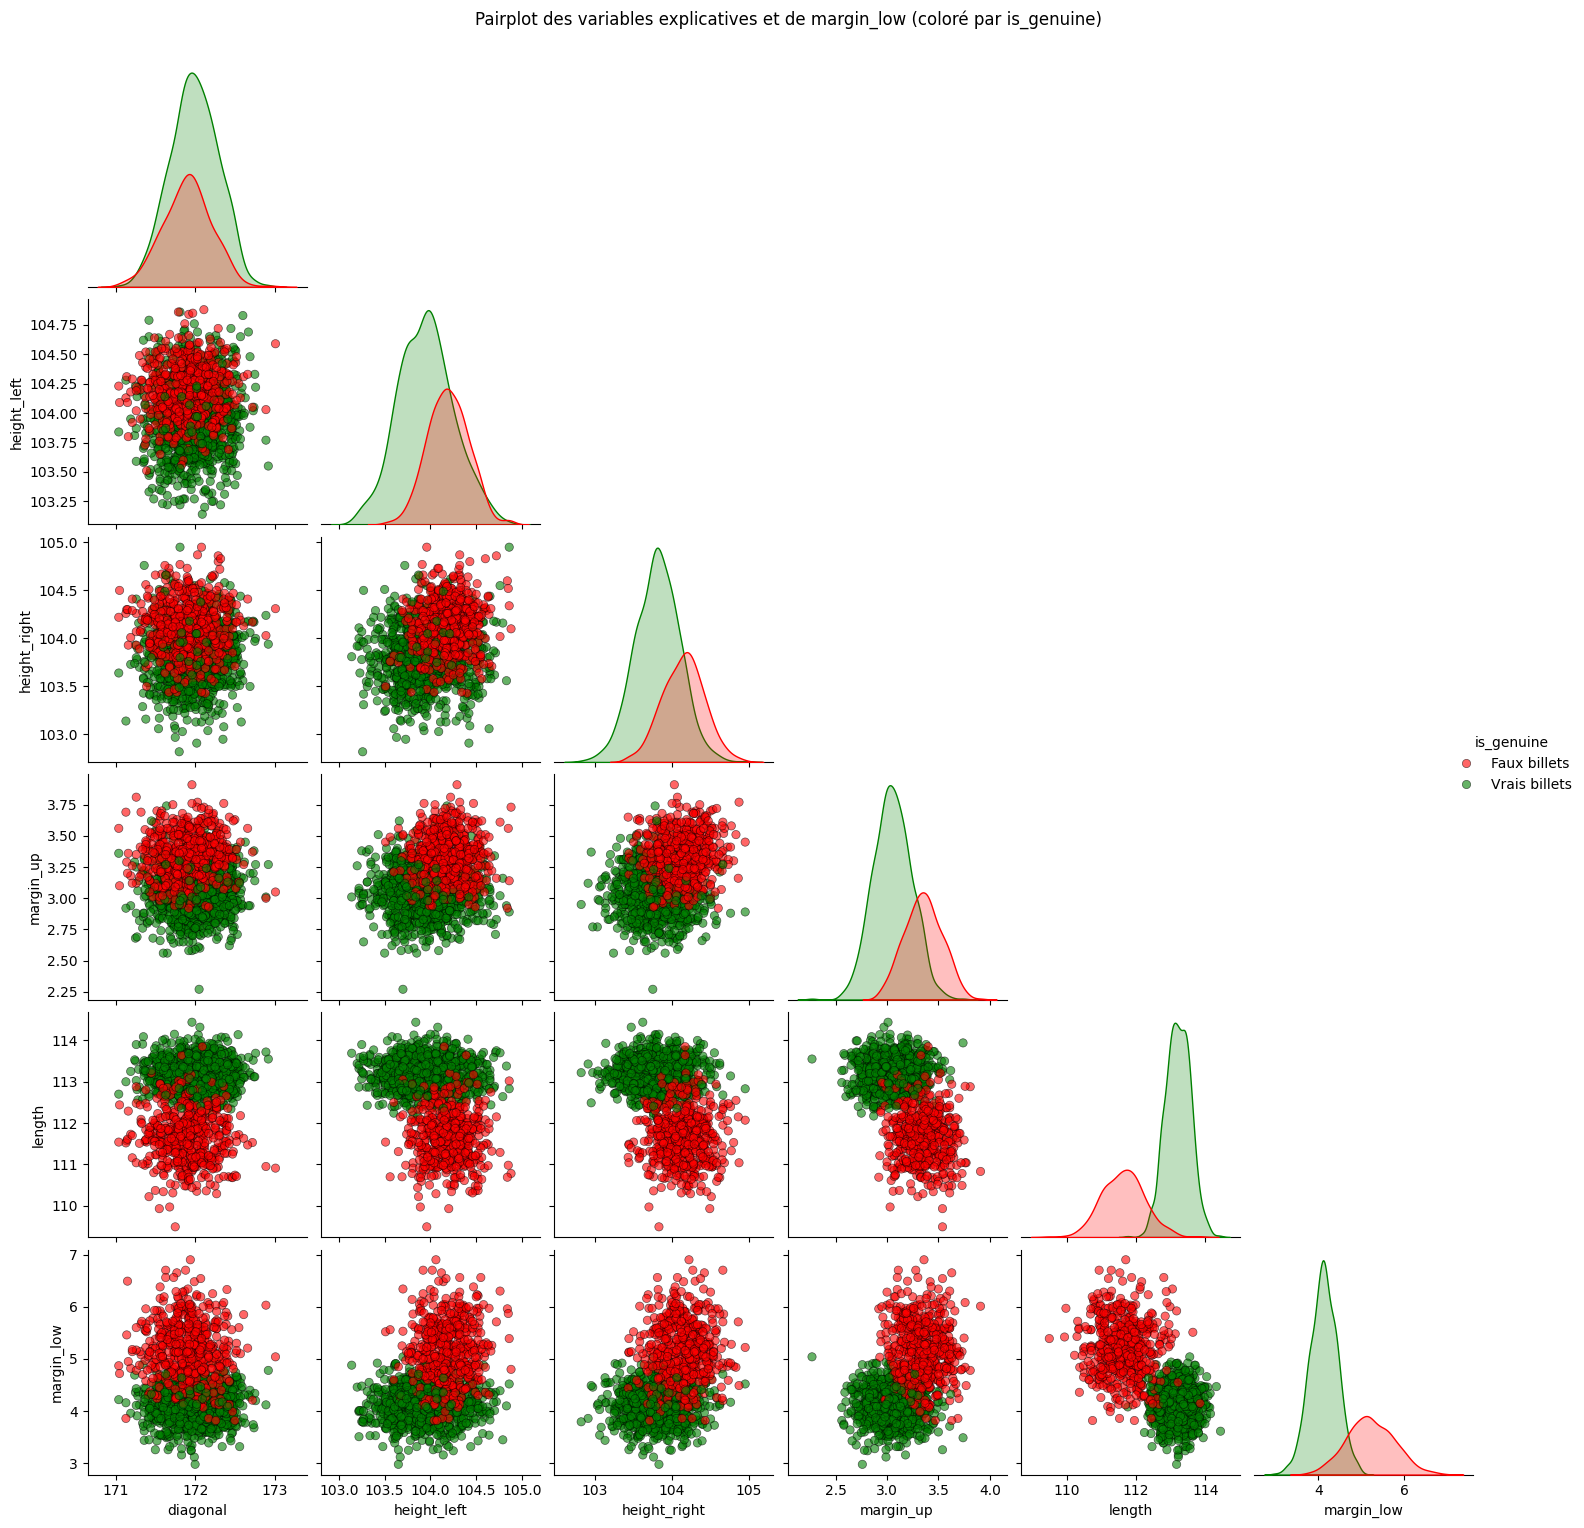

In [31]:
#Création du pair plot

#Palette personnalisée : True = vert, False = rouge
palette = {True: "green", False: "red"}

#Pairplot avec coloration selon is_genuine
g = sns.pairplot(
    df_complet[['diagonal', 'height_left', 'height_right', 'margin_up', 'length', 'margin_low', 'is_genuine']],
    diag_kind="kde",
    corner=True,
    hue="is_genuine",
    palette=palette,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

#Ajout d'un titre
plt.suptitle("Pairplot des variables explicatives et de margin_low (coloré par is_genuine)", y=1.02)

#Personnalisation de la légende
new_labels = ["Faux billets", "Vrais billets"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.show()


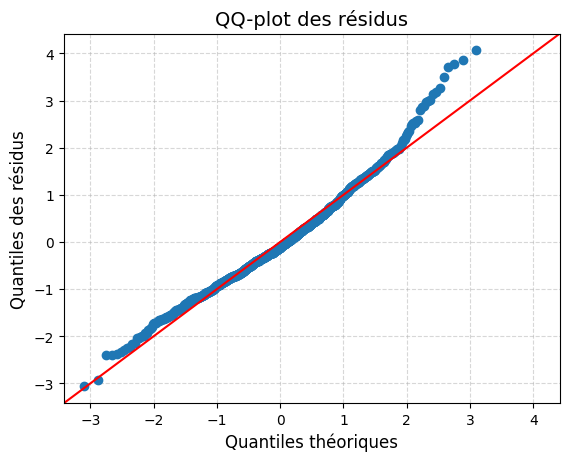

In [32]:
#QQ plot des résidus

#Prédictions du modèle sklearn
y_pred_train = model.predict(X_train)

#Résidus = valeurs réelles - valeurs prédites
residuals = y_train - y_pred_train

#QQ-plot avec ligne de référence y = x
fig = sm.qqplot(residuals, line='45', fit=True)

plt.title("QQ-plot des résidus", fontsize=14)
plt.xlabel("Quantiles théoriques", fontsize=12)
plt.ylabel("Quantiles des résidus", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Les points s'écartent formtement de la droite de normalité aux extrémités donc la distribution n'est pas normale.

#Etape 4 - ACP

##4.1 - Test de normalité

In [33]:
#Test de normalité sur la variable cible

from scipy.stats import shapiro

#Test de Shapiro-Wilk sur la variable cible du train
stat, p_value = shapiro(y_train)

print("Statistique de test :", stat)
print("p-value :", p_value)

if p_value > 0.05:
    print("✅ La variable cible (y_train) suit une loi normale (H0 non rejetée).")
else:
    print("⚠️ La variable cible (y_train) ne suit pas une loi normale (H0 rejetée).")


Statistique de test : 0.9300204801681815
p-value : 1.838129264839404e-21
⚠️ La variable cible (y_train) ne suit pas une loi normale (H0 rejetée).


La distribution ne suit pas une distribution normale.

##4.2 - Matrice de corrélation de Spearman

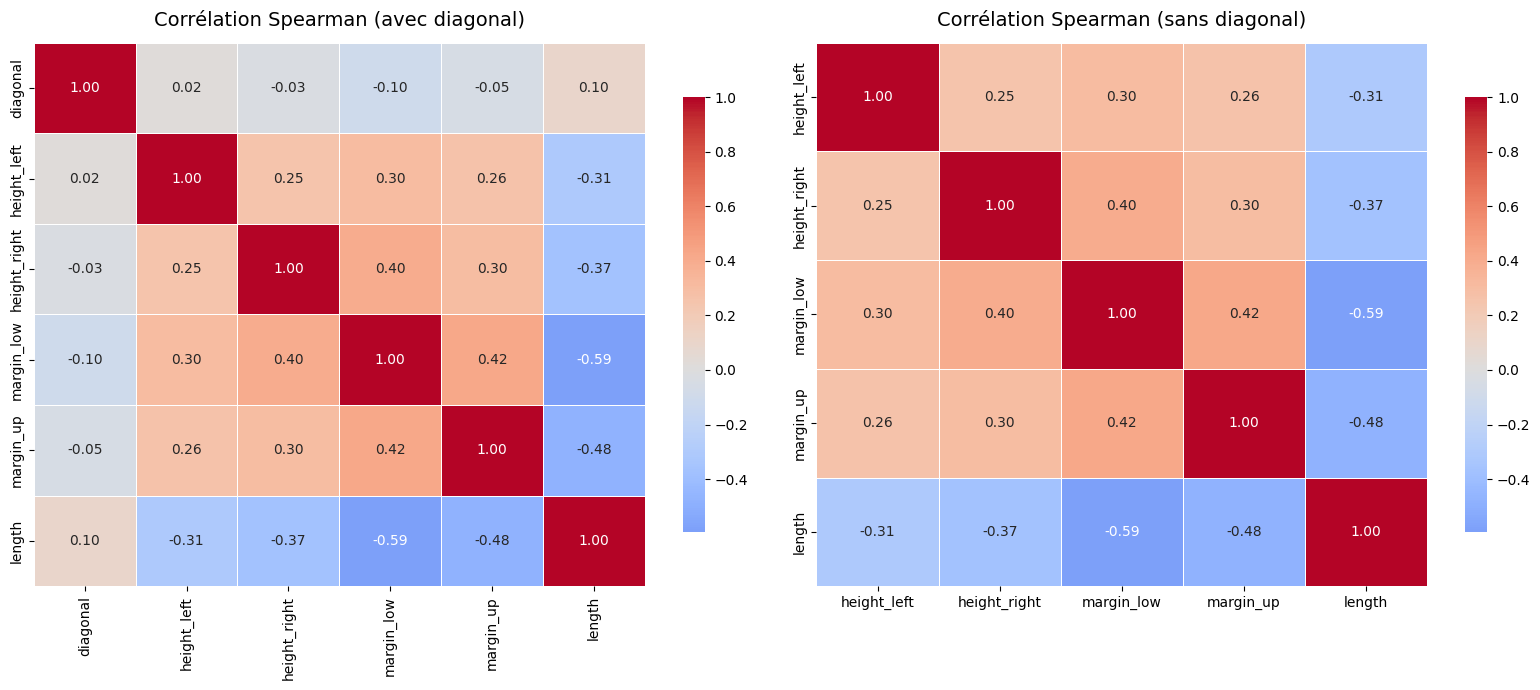

In [34]:
#Création de la matrice

#Avec la variable diagonal

X_with_diag = df_complet[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
corr_with_diag = X_with_diag.corr(method='spearman')

#Sans la variable diagonal
X_without_diag = df_complet[['height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
corr_without_diag = X_without_diag.corr(method='spearman')

#Affichage côte à côte
fig, axes = plt.subplots(1, 2, figsize=(16,7))

sns.heatmap(corr_with_diag,
            annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, cbar_kws={"shrink": .8}, ax=axes[0])
axes[0].set_title("Corrélation Spearman (avec diagonal)", fontsize=14, pad=12)

sns.heatmap(corr_without_diag,
            annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, cbar_kws={"shrink": .8}, ax=axes[1])
axes[1].set_title("Corrélation Spearman (sans diagonal)", fontsize=14, pad=12)

plt.tight_layout()
plt.show()


##4.3 - Eboulis des valeurs propres

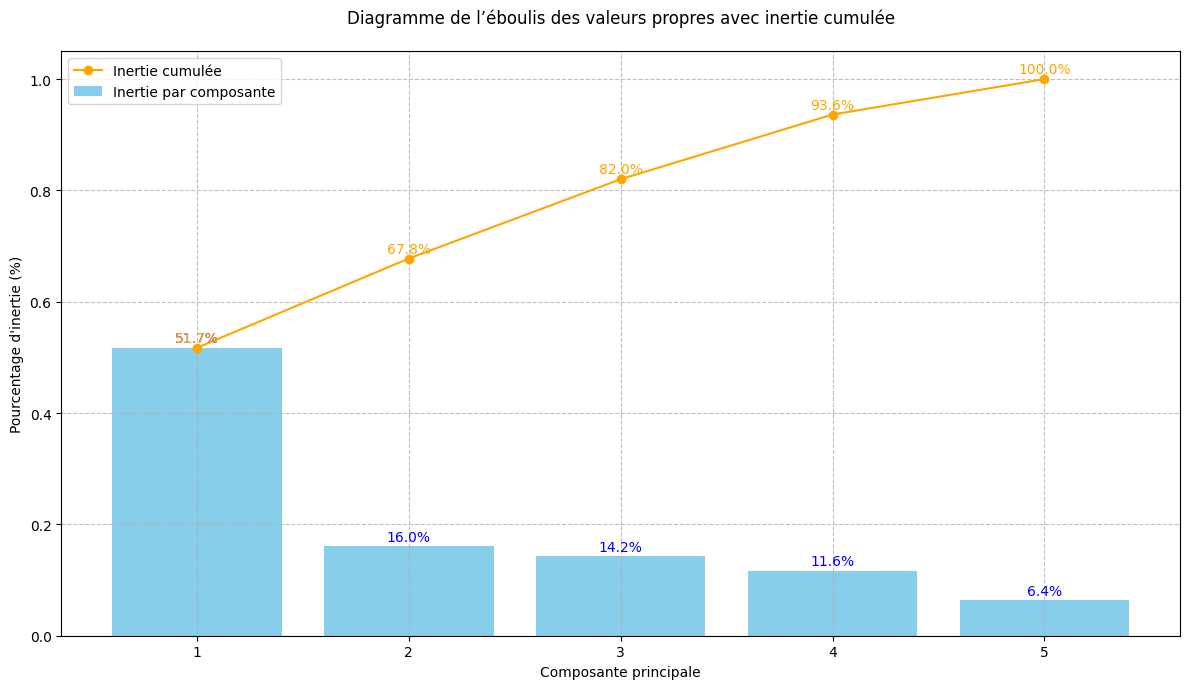

In [35]:
#Eboulis des valeurs propres sans diagonal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Sélection des variables explicatives
X = df_complet[['height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

#Standardisation des données
X_scaled = StandardScaler().fit_transform(X)

#ACP
pca = PCA()
pca.fit(X_scaled)

#Inertie individuelle et cumulée
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

#Diagramme de l'éboulis avec inertie cumulée
plt.figure(figsize=(12, 7))
components = range(1, len(explained_variance_ratio) + 1)

#Barres pour l'inertie individuelle
plt.bar(components, explained_variance_ratio, color='skyblue', label="Inertie par composante")

#Ajout des valeurs au-dessus de chaque barre
for i, val in enumerate(explained_variance_ratio):
    plt.text(i+1, val + 0.005, f"{val*100:.1f}%",  # affichage en %
             ha='center', va='bottom', fontsize=10, color='blue')

#Courbe pour l'inertie cumulée
plt.plot(components, cumulative_variance, color='orange', marker='o', label="Inertie cumulée")

#Ajout des valeurs sur la courbe
for i, val in enumerate(cumulative_variance):
    plt.text(i+1, val + 0.005, f"{val*100:.1f}%",  # affichage en %
             ha='center', va='bottom', fontsize=10, color='orange')

#Détails du graphique
plt.title("Diagramme de l’éboulis des valeurs propres avec inertie cumulée", pad=20)
plt.xlabel("Composante principale")
plt.ylabel("Pourcentage d'inertie (%)")
plt.xticks(components)
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend()
plt.tight_layout()
plt.show()

Je choisis un seuil de 90% donc le nombre de composantes principales à l'étape suivante sera de 4.

##4.4 - Cercles des corrélations

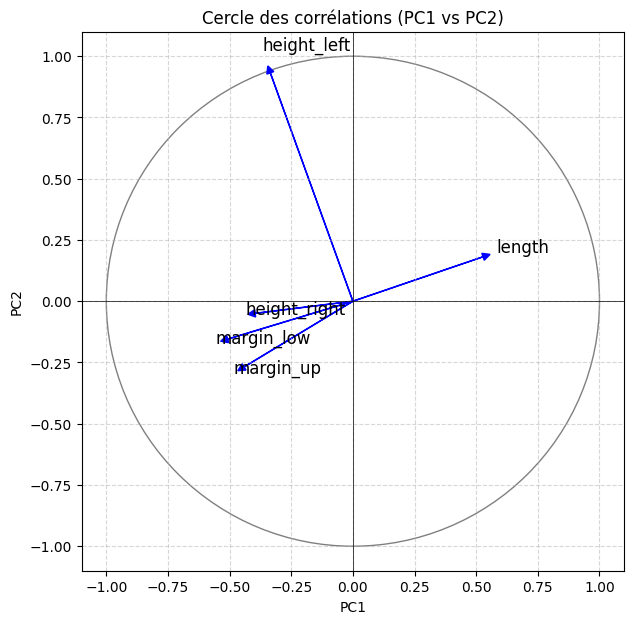

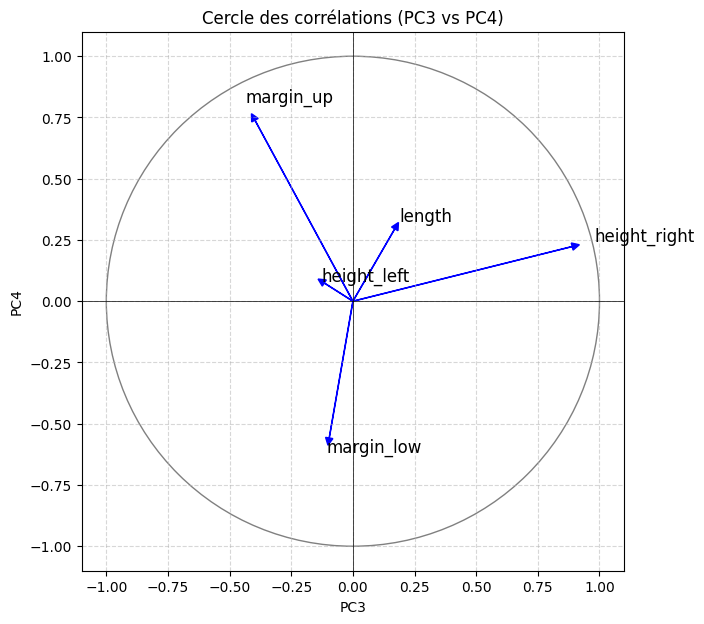

In [36]:
#Cercles des corrélations sans diagonal

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Sélection des variables
X = df_complet[['height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

#Standardisation
X_scaled = StandardScaler().fit_transform(X)

#ACP
pca = PCA(n_components=4)  # on garde au moins 4 composantes
pca.fit(X_scaled)

#Récupération des composantes
components = pca.components_.T   # matrice des loadings
features = X.columns

#Fonction pour tracer un cercle des corrélations
def plot_correlation_circle(components, features, pcx=1, pcy=2):
    plt.figure(figsize=(7,7))

    # Cercle unité
    circle = plt.Circle((0,0), 1, color='gray', fill=False)
    plt.gca().add_artist(circle)

    # Flèches pour chaque variable
    for i, feature in enumerate(features):
        plt.arrow(0, 0, components[i, pcx-1], components[i, pcy-1],
                  head_width=0.03, head_length=0.03, fc='blue', ec='blue')
        plt.text(components[i, pcx-1]*1.1, components[i, pcy-1]*1.1,
                 feature, fontsize=12, color='black')

    # Axes
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xlabel(f"PC{pcx}")
    plt.ylabel(f"PC{pcy}")
    plt.title(f"Cercle des corrélations (PC{pcx} vs PC{pcy})")
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

#Tracer pour PC1 vs PC2
plot_correlation_circle(components, features, pcx=1, pcy=2)

#Tracer pour PC3 vs PC4
plot_correlation_circle(components, features, pcx=3, pcy=4)

##4.5 - Représentation des individus

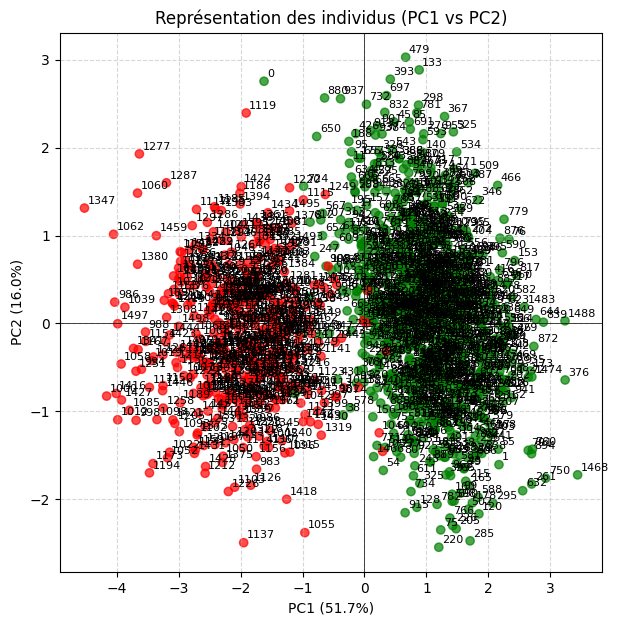

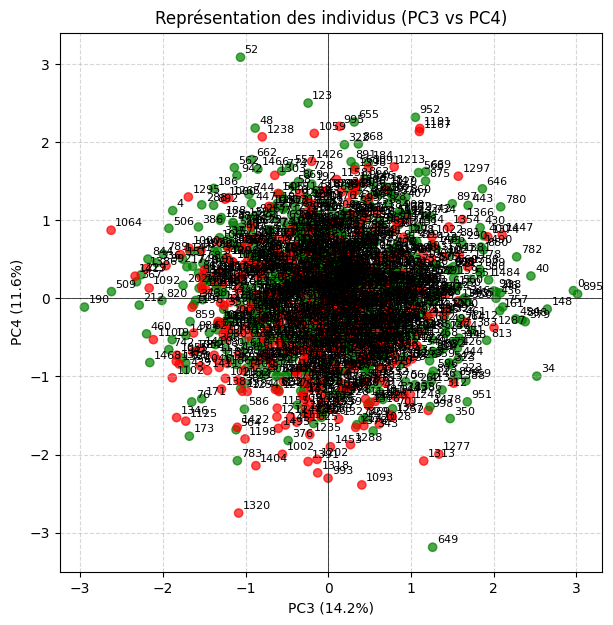

In [37]:
#Représentation des individus sans diagonal

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Sélection des variables
X = df_complet[['height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

#Standardisation
X_scaled = StandardScaler().fit_transform(X)

#ACP
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

#Couleurs selon is_genuine
colors = ['green' if val else 'red' for val in df_complet['is_genuine']]

#Représentation des individus
def plot_individuals(X_pca, pcx=1, pcy=2, labels=None, colors=None):
    plt.figure(figsize=(7,7))

    # Scatter plot des individus avec couleurs
    plt.scatter(X_pca[:, pcx-1], X_pca[:, pcy-1],
                c=colors, alpha=0.7)

    # Ajout des labels si disponibles
    if labels is not None:
        for i, label in enumerate(labels):
            plt.text(X_pca[i, pcx-1]+0.05, X_pca[i, pcy-1]+0.05, label, fontsize=8)

    # Axes et titres
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel(f"PC{pcx} ({pca.explained_variance_ratio_[pcx-1]*100:.1f}%)")
    plt.ylabel(f"PC{pcy} ({pca.explained_variance_ratio_[pcy-1]*100:.1f}%)")
    plt.title(f"Représentation des individus (PC{pcx} vs PC{pcy})")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# Labels facultatifs
labels = df_complet.index.astype(str)

# Tracer pour PC1 vs PC2
plot_individuals(X_pca, pcx=1, pcy=2, labels=labels, colors=colors)

# Tracer pour PC3 vs PC4
plot_individuals(X_pca, pcx=3, pcy=4, labels=labels, colors=colors)

#Etape 5 - Prétraitement

Le but est de transformer tes données brutes (les valeurs mesurées des billets) en données que les algorithmes de Machine Learning peuvent comprendre efficacement.


D'abord, il faut séparer les variables explicatives et la cible :

X = les mesures du billet (longueur, hauteur…)

y = l’étiquette (vrai ou faux)

➡️ Pourquoi ?
Parce que le modèle doit apprendre à prédire y en fonction de X.

In [38]:
X = df_billets_filtre[["height_left", "height_right", "margin_low", "margin_up", "length"]]
y = df_billets_filtre["is_genuine"]

Autre point important : on entraîne toujours le modèle sur un morceau des données, et on teste sur un autre qu’il n’a jamais vu.

➡️ Pourquoi ?
Pour éviter le sur-apprentissage (le modèle apprend par cœur sans savoir généraliser).

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Enfin, on met toutes les variables sur la même échelle (moyenne = 0, écart-type = 1).

➡️ Pourquoi ?
Parce que certains modèles, comme le KNN ou la Régression Logistique, sont sensibles aux différences d’échelle.
Sans standardisation, la variable la plus grande numériquement prend trop d’importance.

In [40]:
from sklearn.preprocessing import StandardScaler

#Initialisation du scaler
scaler = StandardScaler()

#Fit sur X_train uniquement (apprentissage des moyennes et écarts-types)
scaler.fit(X_train)

#Transformation de X_train et X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Contrôle : affichage des moyennes et variances après normalisation

print("Moyennes sur X_train_scaled :", np.mean(X_train_scaled, axis=0))
print("Variances sur X_train_scaled :", np.var(X_train_scaled, axis=0))

print("Moyennes sur X_test_scaled :", np.mean(X_test_scaled, axis=0))
print("Variances sur X_test_scaled :", np.var(X_test_scaled, axis=0))


Moyennes sur X_train_scaled : [ 5.5879354e-09 -2.1420419e-08  1.2805685e-08  2.7939677e-09
 -9.3132257e-10]
Variances sur X_train_scaled : [0.99999994 1.         1.         1.         1.        ]
Moyennes sur X_test_scaled : [-0.05176566  0.00440395  0.00580056 -0.06097307 -0.00320184]
Variances sur X_test_scaled : [0.98239416 0.9501009  0.957153   1.0155646  1.0023185 ]


In [41]:
#Conversion de y_train et y_test en 0/1
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [42]:
print(y_train.value_counts())

is_genuine
1    680
0    344
Name: count, dtype: int64


#Etape 6 - Modélisation

Dans tous domaines, vous ne pouvez pas progresser si vous ne comprenez pas comment vos outils fonctionnent.

Avant d'utiliser les modèles mathématiques qui suivent, je vous recommande donc de visionner les vidéos suivantes:
* [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8)
* [StatQuest: K-nearest neighbors, Clearly Explained](https://youtu.be/HVXime0nQeI)
* [StatQuest: Random Forests Part 1 - Building, Using and Evaluating](https://youtu.be/J4Wdy0Wc_xQ)
* [StatQuest: Random Forests Part 2: Missing data and clustering](https://www.youtube.com/watch?v=sQ870aTKqiM)
* [StatQuest: K-means clustering](https://youtu.be/4b5d3muPQmA)

##6.1 - Régression logistique

Accuracy : 0.9977220956719818
Précision : 0.9965753424657534
Rappel : 1.0
F1-score : 0.9982847341337907
ROC AUC : 0.9996284944738553

Matrice de confusion :
 [[147   1]
 [  0 291]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       148
           1       1.00      1.00      1.00       291

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



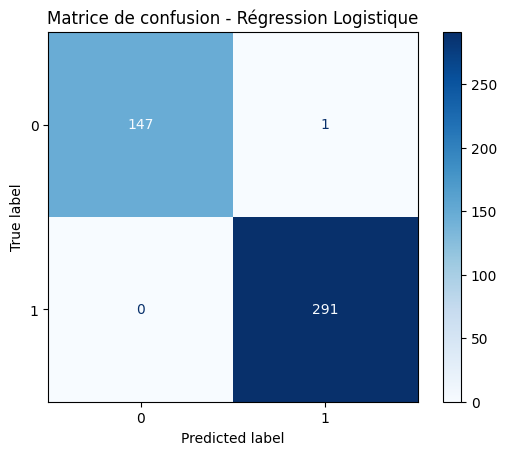

In [43]:
#Algorithme de la régression logistique

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report)

#Initialisation
log_reg = LogisticRegression(max_iter=1000, random_state=42)

#Entraînement
log_reg.fit(X_train_scaled, y_train)

#Prédictions
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:,1]

#Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Précision :", precision_score(y_test, y_pred))
print("Rappel :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC AUC :", roc_auc_score(y_test, y_proba))

print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

#Affichage graphique de la matrice de confusion
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, cmap="Blues")
plt.title("Matrice de confusion - Régression Logistique")
plt.show()


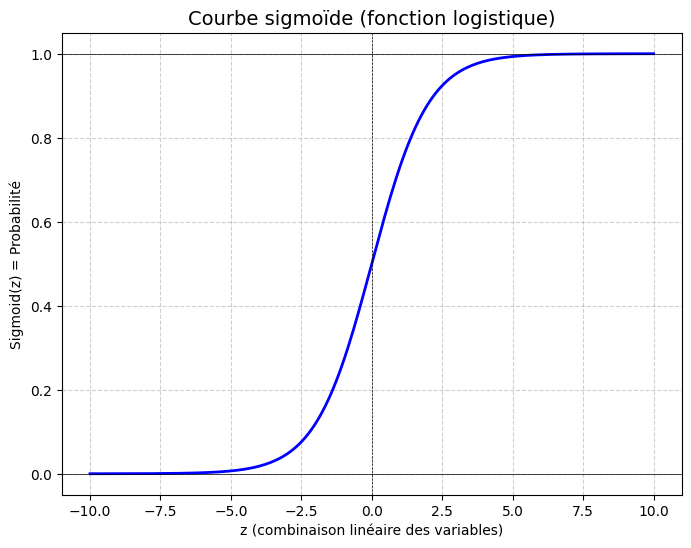

In [44]:
#Visualisation de la courbe sigmoïde

#Définition de la fonction sigmoïde
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Génération de valeurs pour z
z = np.linspace(-10, 10, 200)
y = sigmoid(z)

#Tracé de la courbe
plt.figure(figsize=(8,6))
plt.plot(z, y, color="blue", linewidth=2)
plt.axhline(0, color="black", linewidth=0.5)
plt.axhline(1, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")

plt.title("Courbe sigmoïde (fonction logistique)", fontsize=14)
plt.xlabel("z (combinaison linéaire des variables)")
plt.ylabel("Sigmoid(z) = Probabilité")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


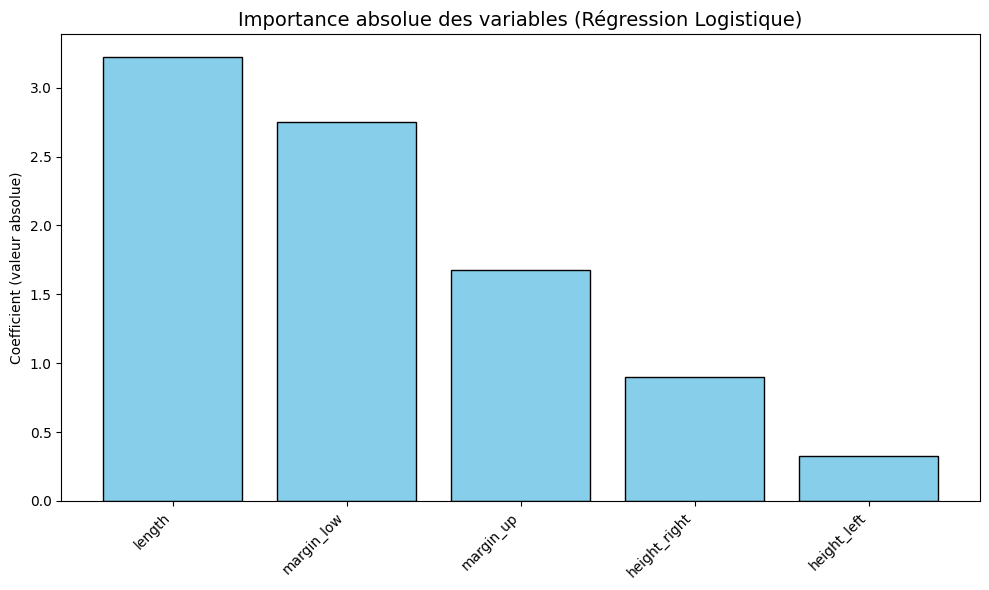

In [45]:
#Création du barplot sur l'importance des variables en valeur absolue

#Récupération des coefficients
coefficients = log_reg.coef_[0]
features = X_train.columns

#Tri par importance absolue
indices = np.argsort(np.abs(coefficients))[::-1]

#Barplot avec valeurs absolues
plt.figure(figsize=(10,6))
plt.bar(range(len(features)), np.abs(coefficients[indices]),
        color="skyblue", edgecolor="black")
plt.xticks(range(len(features)), [features[i] for i in indices],
           rotation=45, ha="right")
plt.title("Importance absolue des variables (Régression Logistique)", fontsize=14)
plt.ylabel("Coefficient (valeur absolue)")
plt.tight_layout()
plt.show()


##6.2 - KNN

Accuracy : 0.9954441913439636
Précision : 0.9931740614334471
Rappel : 1.0
F1-score : 0.9965753424657534
ROC AUC : 0.9997910281415436

Matrice de confusion :
 [[146   2]
 [  0 291]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.99      1.00      1.00       291

    accuracy                           1.00       439
   macro avg       1.00      0.99      0.99       439
weighted avg       1.00      1.00      1.00       439



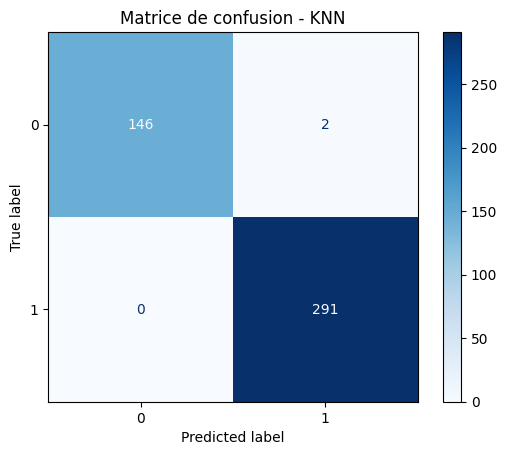

In [46]:
#Algorithme KNN

from sklearn.neighbors import KNeighborsClassifier

#Initialisation
knn = KNeighborsClassifier(n_neighbors=5)

#Entraînement
knn.fit(X_train_scaled, y_train)

#Prédictions
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:,1]

# Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Précision :", precision_score(y_test, y_pred_knn))
print("Rappel :", recall_score(y_test, y_pred_knn))
print("F1-score :", f1_score(y_test, y_pred_knn))
print("ROC AUC :", roc_auc_score(y_test, y_proba_knn))

print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_knn))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_knn))

#Affichage graphique
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, cmap="Blues")
plt.title("Matrice de confusion - KNN")
plt.show()


In [47]:
#Vérification de l'exactitude
from sklearn.metrics import accuracy_score

feature_importance_knn = {}

for feature in X_train.columns:
    # Entraînement sans cette variable
    X_train_reduced = X_train_scaled[:, X_train.columns != feature]
    X_test_reduced = X_test_scaled[:, X_test.columns != feature]

    knn.fit(X_train_reduced, y_train)
    y_pred_reduced = knn.predict(X_test_reduced)

    # Calcul de la baisse de précision
    acc = accuracy_score(y_test, y_pred_reduced)
    feature_importance_knn[feature] = acc

#Affichage des résultats
print("Impact de chaque variable sur la précision (KNN) :")
for feat, acc in feature_importance_knn.items():
    print(f"{feat}: {acc:.3f}")


Impact de chaque variable sur la précision (KNN) :
height_left: 0.995
height_right: 0.995
margin_low: 0.982
margin_up: 0.995
length: 0.959


##6.3 - Random Forest

Accuracy : 0.9954441913439636
Précision : 0.9965635738831615
Rappel : 0.9965635738831615
F1-score : 0.9965635738831615
ROC AUC : 0.9997561994984676

Matrice de confusion :
 [[147   1]
 [  1 290]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       1.00      1.00      1.00       291

    accuracy                           1.00       439
   macro avg       0.99      0.99      0.99       439
weighted avg       1.00      1.00      1.00       439



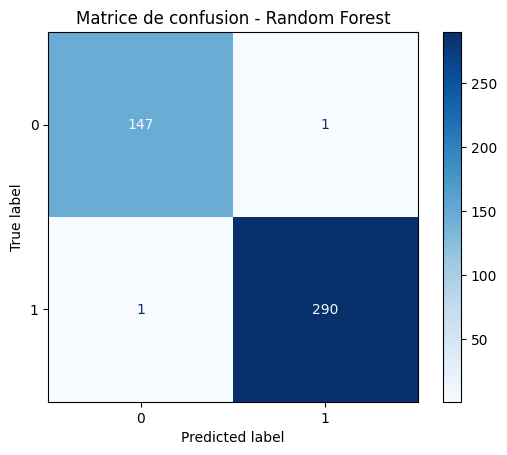

In [48]:
#Alogorithme Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialisation
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#Entraînement
rf.fit(X_train_scaled, y_train)

#Prédictions
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:,1]

#Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Précision :", precision_score(y_test, y_pred_rf))
print("Rappel :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))
print("ROC AUC :", roc_auc_score(y_test, y_proba_rf))

print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))

#Affichage graphique
ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, cmap="Blues")
plt.title("Matrice de confusion - Random Forest")
plt.show()


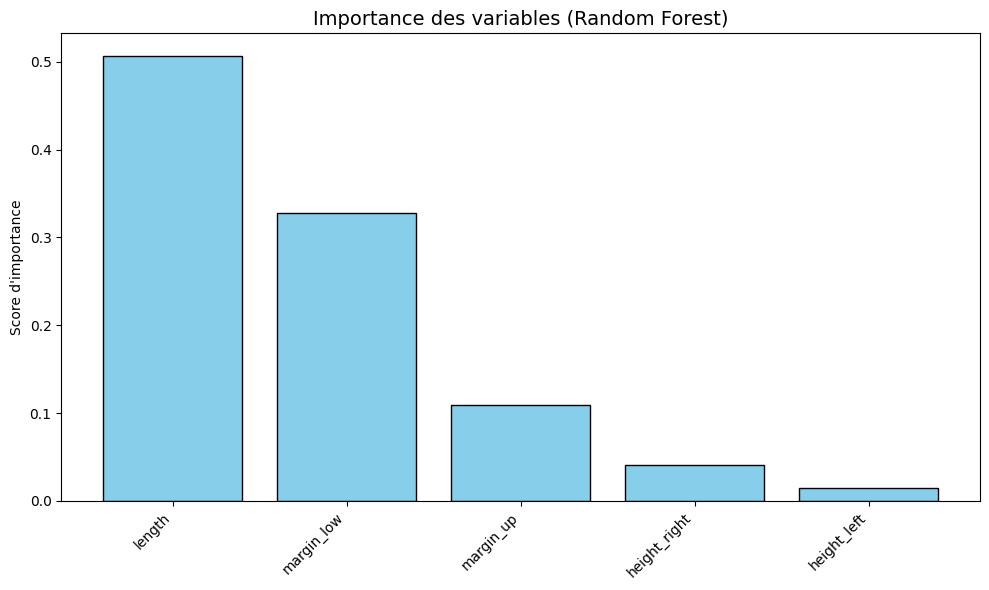

In [49]:
#Visualisation de l'importance des variables

#Récupération de l'importance des variables
importances = rf.feature_importances_
features = X_train.columns

#Tri des variables par importance
indices = np.argsort(importances)[::-1]

#Affichage sous forme de barplot
plt.figure(figsize=(10,6))
plt.bar(range(len(features)), importances[indices], align="center", color="skyblue", edgecolor="black")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45, ha="right")
plt.title("Importance des variables (Random Forest)", fontsize=14)
plt.ylabel("Score d'importance")
plt.tight_layout()
plt.show()


##6.4 - K-Means

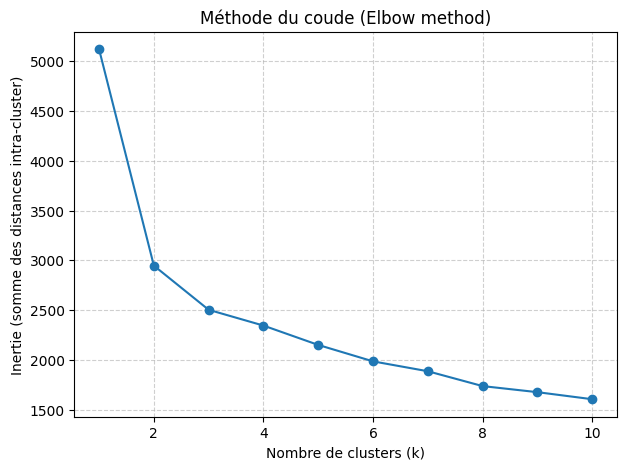

In [50]:
#Algorithme K-Means
from sklearn.cluster import KMeans

#Méthode du coude : calcul de l'inertie pour différents k
inertias = []
K_range = range(1, 11)  # tester de 1 à 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

#Tracé du coude
plt.figure(figsize=(7,5))
plt.plot(K_range, inertias, marker='o')
plt.title("Méthode du coude (Elbow method)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (somme des distances intra-cluster)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Le coude se trouve au niveau de 2 clusters.

In [51]:
#Calcul du score silhouette
from sklearn.metrics import silhouette_score

#Exemple avec k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
labels = kmeans.predict(X_train_scaled)

#Score silhouette
sil_score = silhouette_score(X_train_scaled, labels)
print("Score de silhouette (k=2) :", sil_score)


Score de silhouette (k=2) : 0.39851704


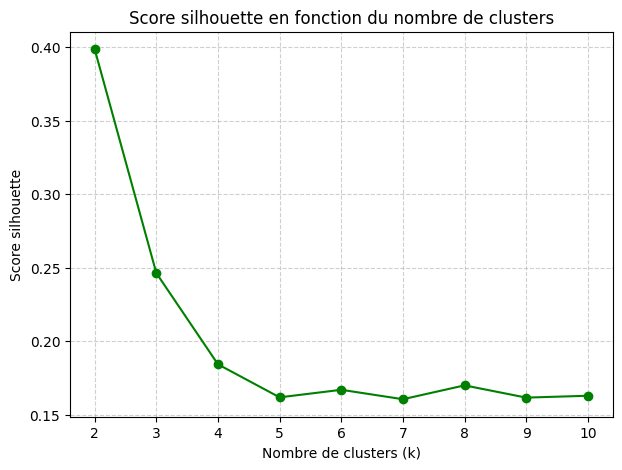

In [52]:
#Visualisation du score silhouette
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    labels = kmeans.predict(X_train_scaled)
    sil_scores.append(silhouette_score(X_train_scaled, labels))

#Tracé des scores silhouette
plt.figure(figsize=(7,5))
plt.plot(K_range, sil_scores, marker='o', color="green")
plt.title("Score silhouette en fonction du nombre de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score silhouette")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Le score silhouette est à son niveau le plus élévé pour 2 clusters.

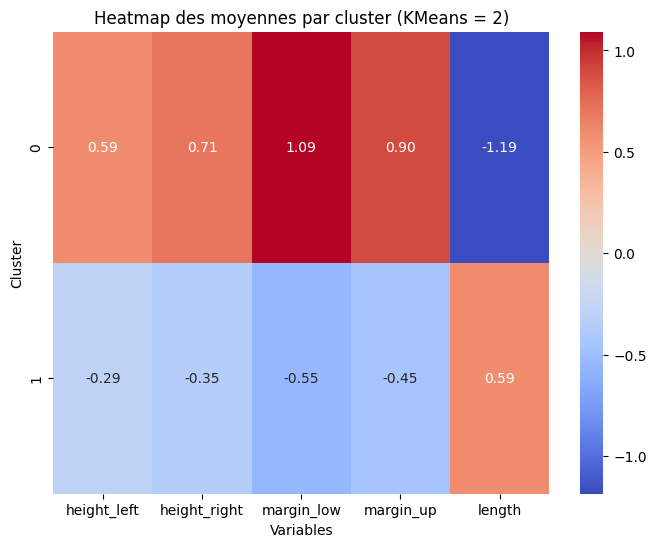

In [53]:
#Visualisation du heatmap

#KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_train_scaled)

#Création d'un DataFrame avec les clusters
df_clusters = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_clusters["Cluster"] = labels

#Moyenne des variables par cluster
cluster_means = df_clusters.groupby("Cluster").mean()

#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap des moyennes par cluster (KMeans = 2)")
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.show()


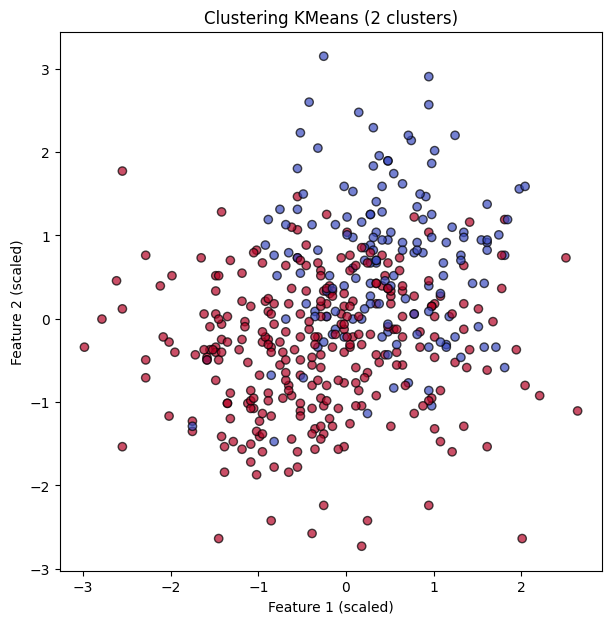

In [54]:
#Visualisation des 2 clusters

#Initialisation du modèle KMeans
# n_clusters = nombre de groupes à former (ici 2 car on a "vrais" vs "faux" billets)
kmeans = KMeans(n_clusters=2, random_state=42)

#Entraînement sur les données (non supervisé)
kmeans.fit(X_train_scaled)

#Prédictions des clusters
y_pred_kmeans = kmeans.predict(X_test_scaled)

#Visualisation rapide sur deux composantes principales
plt.figure(figsize=(7,7))
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_pred_kmeans, cmap="coolwarm", alpha=0.7, edgecolors="k")
plt.title("Clustering KMeans (2 clusters)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


#Etape 7 - Sélection du meilleur modèle

Mais alors, quel est le meilleur modèle pour résoudre ce problème ?

Pour répondre à cette question, il vous faut bien comprendre l'intérêt de chacune des métriques d'évaluation qui existent pour ce type de problème.

Vous me voyez venir... 😎 : StatQuest !!! 🤩
* [Machine Learning Fundamentals: Sensitivity and Specificity
](https://youtu.be/vP06aMoz4v8)
* [Machine Learning Fundamentals: The Confusion Matrix](https://youtu.be/Kdsp6soqA7o)
* [ROC and AUC, Clearly Explained!](https://youtu.be/4jRBRDbJemM)

Vous avez aussi des petits modules sympathiques sur Sklearn qui vous machent grandement le travail:
* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
* [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

A vous de jouer ! 🚀

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# C'est là qu'on voit qui sont les bons 😉!

VOIR L'ETAPE 6 AVEC LES MODELISATIONS DES ALGORITHMES.

#Etape 8 - Sauvegarde du meilleur modèle

**_ATTENTION_** :
```
Sauvegarder un modèle implique de sauvegarder aussi les étapes de préprocessing des données.
Dans votre cas, vous devez donc inclure, à minima, votre StandardScaler.
```
Voir [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) pour plus d'infos.

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

#Création du pipeline : scaler + modèle
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

#Entraînement du pipeline
pipeline.fit(X_train, y_train)

#Évaluation rapide
print("Score sur le test :", pipeline.score(X_test, y_test))

#Sauvegarde du pipeline (scaler + modèle)
joblib.dump(pipeline, "meilleur_modele.pkl")


Score sur le test : 0.9977220956719818


['meilleur_modele.pkl']

In [57]:
#Chargement le pipeline sauvegardé
pipeline_loaded = joblib.load("meilleur_modele.pkl")

#Utilisation directement sur de nouvelles données
y_pred_new = pipeline_loaded.predict(X_test)
